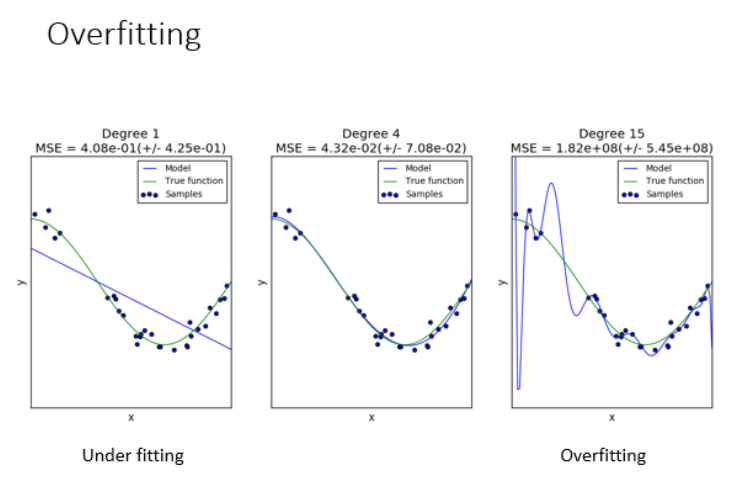

* 訓練時獲得良好的準確率
* 使用 test dataset 預測卻出現較差的準確率
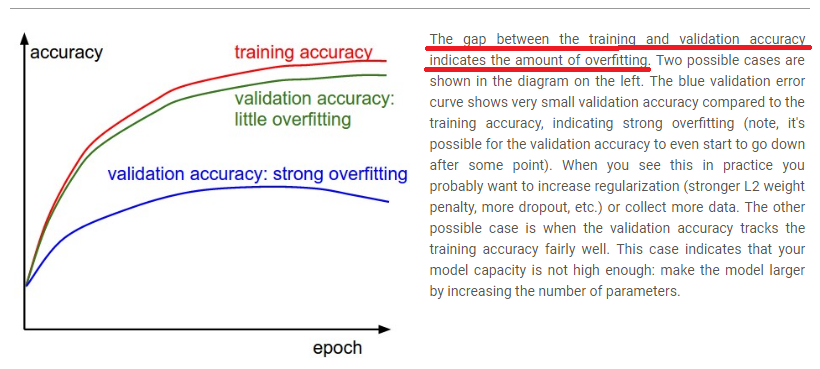
* 如何解決?

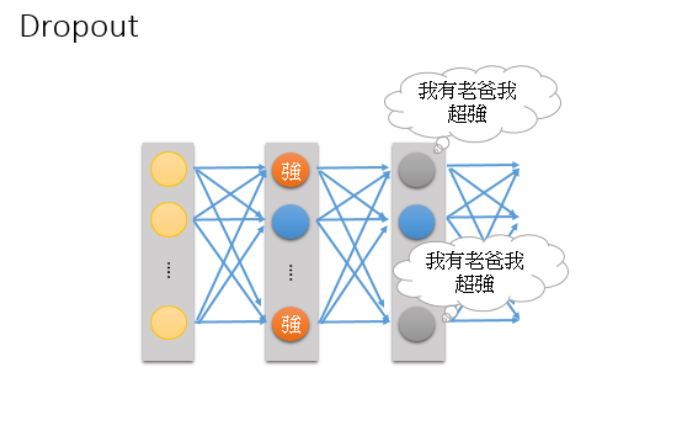

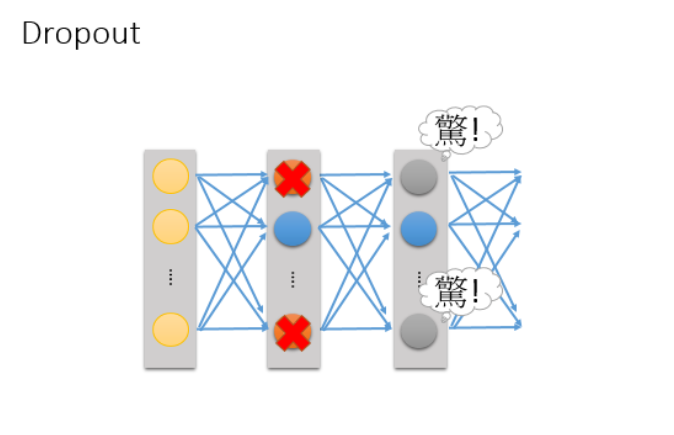

## 使用上個範例嘗試修正 overfitting 問題

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
np.random.seed(1)

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    print("channels_first")
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

/home/tony/dnn/anaconda2/envs/myjupyter/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 新增兩層 dropout layers

In [ ]:
dropouts = [0.0, 0.1, 0.2]
for dropout in dropouts:
    print("=======================> dropout: %f" % (dropout))
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))                          # dropout layer 1
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))                          # dropout layer 2
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adagrad',
                  metrics=['accuracy'])

    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=2,
              validation_data=(x_test, y_test))

* "acc": training 精確率; "val_acc": validation(test) 精確率
* dropout=0.0 means 沒有 dropout, 誤差約 0.91%
* dropout=0.1 means 10% dropout, 誤差約 0.54%
* dropout=0.2 means 20% dropout, 誤差約 0.29% (縮小 1/3)

```
=======================> dropout: 0.000000
...
Epoch 10/10
 - 337s - loss: 0.0095 - acc: 0.9976 - val_loss: 0.0378 - val_acc: 0.9885
=======================> dropout: 0.100000
...
Epoch 10/10
 - 338s - loss: 0.0137 - acc: 0.9959 - val_loss: 0.0274 - val_acc: 0.9905
=======================> dropout: 0.200000
...
Epoch 10/10
 - 326s - loss: 0.0222 - acc: 0.9932 - val_loss: 0.0292 - val_acc: 0.9903
```